In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.patches as mpatches

In [ ]:
dataUji = pd.read_csv('dataTest.csv')
dataUji


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.024394,-0.012901,0.000827,-0.280692,0.280990
1,0.032298,-0.016720,0.001508,-0.349285,0.349688
2,0.040171,-0.017440,0.002993,-0.379675,0.380087
3,0.048136,-0.017471,0.004677,-0.378956,0.379387
4,0.056010,-0.016534,0.004925,-0.318498,0.318965
...,...,...,...,...,...
7581,59.977157,0.137128,0.001574,-0.369118,0.393769
7582,59.985068,0.119792,0.010323,-0.376059,0.394812
7583,59.993063,0.115145,0.021724,-0.330239,0.350412
7584,60.000967,0.098104,0.021102,-0.248483,0.267980


In [ ]:
dataGyro = pd.read_excel('dataGyroscope.xls')
dataGyro

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
0,0.014949,-0.002663,-0.010120,-0.027164,0.029110
1,0.016963,-0.002663,-0.010120,-0.027164,0.029110
2,0.018977,-0.002663,-0.010120,-0.027164,0.029110
3,0.020961,-0.002663,-0.010120,-0.027164,0.029110
4,0.022914,-0.002663,-0.010120,-0.027164,0.029110
...,...,...,...,...,...
30369,60.025794,-0.001598,0.012783,0.002663,0.013155
30370,60.027613,-0.000533,0.013848,0.002663,0.014112
30371,60.029597,-0.001598,0.015979,0.002131,0.016199
30372,60.031598,0.000000,0.014381,-0.002131,0.014538


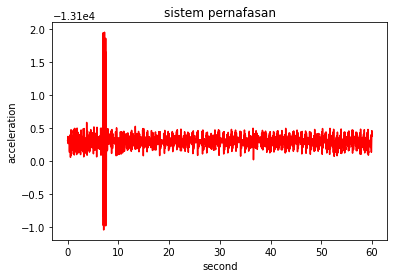

In [ ]:
x = dataUji['Time (s)']
ax = dataUji['Linear Acceleration x (m/s^2)']
ax = ax-(sum(ax)/-0.012901)
plt.plot(x, ax, color = 'red')
plt.title('sistem pernafasan')
plt.xlabel('second')
plt.ylabel('acceleration')
plt.show()

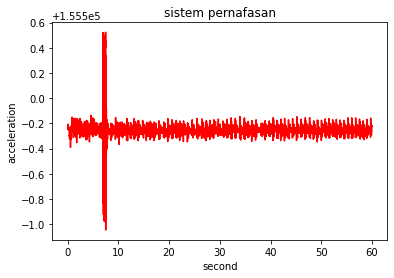

In [ ]:
y = dataUji['Time (s)']
ay = dataUji['Linear Acceleration y (m/s^2)']
ay = ay-(sum(ay)/0.000827)
plt.plot(y,ay,color = 'red')
plt.title('sistem pernafasan')
plt.xlabel('second')
plt.ylabel('acceleration')
plt.show()

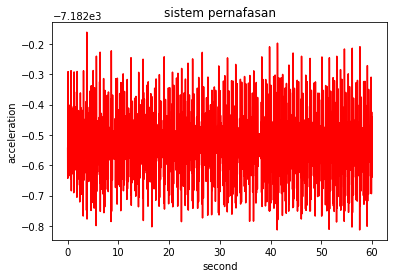

In [ ]:
z = dataUji['Time (s)']
az = dataUji['Linear Acceleration z (m/s^2)']
az = az-(sum(az)/-0.280692)
plt.plot(z,az,color = 'red')
plt.title('sistem pernafasan')
plt.xlabel('second')
plt.ylabel('acceleration')
plt.show()

No 4

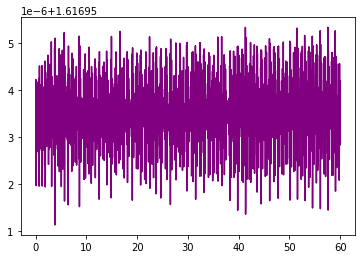

In [ ]:
x = dataUji['Time (s)']

sudutAcc = np.arctan2(ay,az)
plt.plot(x,sudutAcc, color = 'purple')


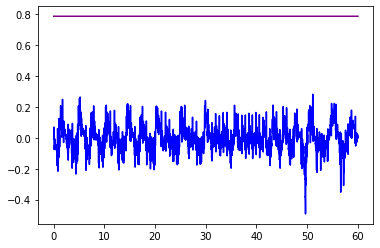

In [ ]:
sudutAcc = np.arctan2(y,z)
GyroY = dataGyro['Gyroscope y (rad/s)']
GyroTime = dataGyro['Time (s)']
plt.plot(y,sudutAcc,color = 'purple', label = 'Accelerometer angle')
plt.plot(GyroTime,GyroY, color ='blue', label = 'GyroscopeYaw')


plt.show()

no 5

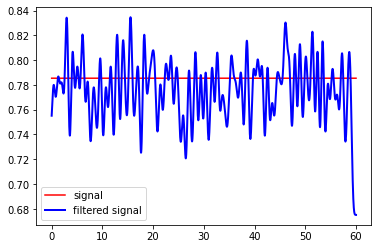

In [ ]:
from scipy.signal import butter, filtfilt

# reference
# https://www.kite.com/python/answers/how-to-create-a-low-pass-filter-in-python
# https://dsp.stackexchange.com/questions/49460/apply-low-pass-butterworth-filter-in-python






frequency_sampling = 100
cutoff_freq = 0.8
order = 10

normalized_cutoff_freq = cutoff_freq / (frequency_sampling / 2)

b, a = butter(order, normalized_cutoff_freq, 'low')
filtered_signal = filtfilt(b, a, sudutAcc)

plt.plot(y, sudutAcc, 'b-', label='signal', color='red')
plt.plot(y, filtered_signal, 'g-', linewidth=2, label='filtered signal', color='blue')
plt.legend()
plt.savefig('lpf')
plt.show()

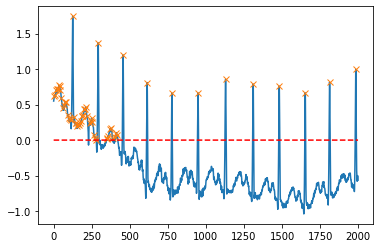

In [ ]:
from scipy.integrate import odeint
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[3000:5000]
peaks,_  = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="red")
plt.show()

In [ ]:
print(len(peaks))

60


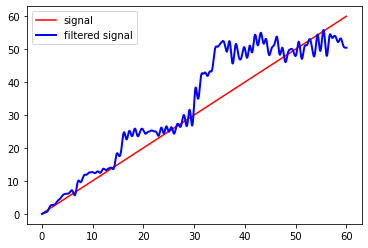

In [ ]:
from scipy.signal import butter, filtfilt







frequency_sampling = 100
cutoff_freq = 0.8
order = 10

normalized_cutoff_freq = cutoff_freq / (frequency_sampling / 2)

b, a = butter(order, normalized_cutoff_freq, 'low')
filtered_signal = filtfilt(b, a, z)

plt.plot(y, z, 'b-', label='signal', color='red')
plt.plot(y, filtered_signal, 'g-', linewidth=2, label='filtered signal', color='blue')
plt.legend()
plt.savefig('lpf')
plt.show()

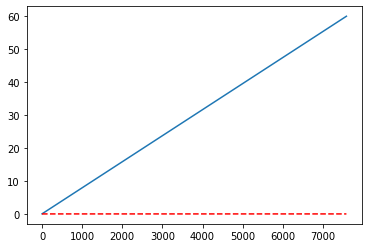

In [ ]:
from scipy.integrate import odeint

from scipy.signal import find_peaks

x = z
peaks,_  = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="red")
plt.show()

In [ ]:
print(len(peaks))

0
